In [1]:
import pandas as pd
import requests
import os
import re
from datetime import datetime

In [2]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf8')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
folder_name = ' tweet_image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
tweet_img = pd.read_csv(' tweet_image_prediction/image-predictions.tsv', sep='\t', engine='python')
tweet_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
data = []
for line in open('tweet-json.json', 'r'):
    data.append(json.loads(line))

In [7]:
tweets = pd.DataFrame(data)

In [8]:
tweets.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1290,None,None,Fri Mar 11 01:56:49 +0000 2016,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708109384879046656, 'id_str'...",2124,False,This is Remington. He was caught off guard by ...,None,...,False,NaN,NaN,NaN,610,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1511,None,None,Sun Jan 24 03:14:07 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691096572814176256, 'id_str'...",3253,False,Here we see one dog giving a puptalk to anothe...,None,...,False,NaN,NaN,NaN,1019,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2205,None,None,Mon Nov 23 03:09:00 +0000 2015,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668627275181633536, 'id_str'...",341,False,This is Timofy. He's a pilot for Southwest. It...,None,...,False,NaN,NaN,NaN,123,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1362,None,None,Thu Feb 25 16:53:11 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1772,False,Say hello to Luna. Her tongue is malfunctionin...,None,...,False,NaN,NaN,NaN,509,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2018,None,None,Wed Dec 02 16:49:14 +0000 2015,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672095178996523008, 'id_str'...",1063,False,This is Tuco. That's the toast that killed his...,None,...,False,NaN,NaN,NaN,395,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
296,None,None,Thu Mar 02 01:20:01 +0000 2017,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 837110202889617409, 'id_str'...",17480,False,This is Clark. He passed pupper training today...,None,...,False,NaN,NaN,NaN,2731,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1702,None,None,Sat Dec 26 23:15:17 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680889641415872512, 'id_str'...",1945,False,This is Cheesy. It's her birthday. She's patie...,None,...,False,NaN,NaN,NaN,418,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1763,None,None,Sun Dec 20 03:02:53 +0000 2015,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678410205395308544, 'id_str'...",4640,False,Say hello to Jerome. He can shoot french fries...,None,...,False,NaN,NaN,NaN,2072,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
812,None,None,Wed Aug 31 21:47:27 +0000 2016,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771102115905372160, 'id_str'...",6898,False,This is Charlie. He works for @TODAYshow. Supe...,None,...,False,NaN,NaN,NaN,1663,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
302,None,None,Tue Feb 28 02:09:08 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Buddy. He ran into a gl...,None,...,NaN,NaN,NaN,NaN,31314,False,{'created_at': 'Sat Jan 07 20:18:46 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
tweets['id'].sample(5)

1384    700518061187723268
2179    668994913074286592
301     836648853927522308
9       890240255349198849
1299    707629649552134146
Name: id, dtype: int64

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment & programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [13]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
tweet_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_img[tweet_img['p1_dog'] == 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [20]:
tweet_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [22]:
tweets.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [23]:
all_columns = pd.Series(list(twitter_archive) + list(tweet_img) + list(tweets))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

# Quality issues
1. dog stage data type

2. missing data in multiple columns in multiple tables

3. tweets id_str column is a duplicate of id column

4. false image predictions from the tweet_img table

5. incorrect numerator and denominator values in the the twitter_archive dataframe

6. incorrect name values in the twitter_archive dataframe

7. `timestamp` datatype in twitter_archive dataframe

8. missing dog stages for some dogs

### Tidiness issues
1. separate dog stage column.

2. tweet id across all three dataframe 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
twitter_archive_clean = twitter_archive.copy()
tweet_img_clean = tweet_img.copy()
tweets_clean = tweets.copy()

### Issue #1: Missing data in multiple columns in `twitter_archive`, `tweet_img`, `tweets`

#### Define: Drop `5` Columns with missing records in `twitter_archive`
#### Drop `15` Columns with missing records in `tweets`

#### Code `twitter_archive`

In [25]:
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_status_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_user_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', axis=1)
twitter_archive_clean = twitter_archive_clean.drop('expanded_urls', axis=1)

#### Code `tweets`

In [26]:
tweets_clean = tweets_clean.drop('contributors', axis=1)
tweets_clean = tweets_clean.drop('coordinates', axis=1)
tweets_clean = tweets_clean.drop('geo', axis=1)
tweets_clean = tweets_clean.drop('in_reply_to_screen_name', axis=1)
tweets_clean = tweets_clean.drop('in_reply_to_status_id', axis=1)
tweets_clean = tweets_clean.drop('in_reply_to_status_id_str', axis=1)
tweets_clean = tweets_clean.drop('in_reply_to_user_id', axis=1)
tweets_clean = tweets_clean.drop('in_reply_to_user_id_str', axis=1)
tweets_clean = tweets_clean.drop('place', axis=1)
tweets_clean = tweets_clean.drop('quoted_status', axis=1)
tweets_clean = tweets_clean.drop('quoted_status_id', axis=1)
tweets_clean = tweets_clean.drop('quoted_status_id_str', axis=1)
tweets_clean = tweets_clean.drop('retweeted_status', axis=1)
tweets_clean = tweets_clean.drop('extended_entities', axis=1)
tweets_clean = tweets_clean.drop('possibly_sensitive', axis=1)
tweets_clean = tweets_clean.drop('possibly_sensitive_appealable', axis=1)

In [27]:
retweet = r"\W*(RT)\s\W*"

In [28]:
retweeted = twitter_archive_clean["text"].str.extract(retweet, expand=False)
retweeted.value_counts()

RT    185
Name: text, dtype: int64

In [29]:
twitter_archive_clean = twitter_archive_clean.assign(retweet= retweeted)

In [30]:
twitter_archive_clean[twitter_archive_clean['retweet'] != 'RT']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,NaN


In [31]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweet'] != 'RT']

In [32]:
twitter_archive_clean = twitter_archive_clean.drop('retweet', axis=1)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2171 non-null int64
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
doggo                 2171 non-null object
floofer               2171 non-null object
pupper                2171 non-null object
puppo                 2171 non-null object
dtypes: int64(3), object(8)
memory usage: 203.5+ KB


In [34]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
created_at            2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
id_str                2354 non-null object
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), int64(3), object(8)
memory usage: 211.6+ KB


### Issue #2: Duplicate columnn `id_str` from `tweets` dataframe. Same as `id` Column

#### Define: Dropping `id_str` column since it duplicates the `id` column

#### Code 

In [35]:
tweets_clean = tweets_clean.drop('id_str', axis=1)

In [36]:
tweets_clean = tweets_clean[tweets_clean['retweeted'] == False]

#### Test

In [37]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 14 columns):
created_at            2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), int64(3), object(7)
memory usage: 211.5+ KB


### Issue #3: Consolidate tweet id from the three tables into one dataframe

#### Define: Merge `tweets` Dataframe into `twiter archive` with tweet_id as the key

#### Code

In [38]:
tweets_clean = tweets_clean.drop('retweet_count', axis=1)
tweets_clean = tweets_clean.drop('retweeted', axis=1)

In [39]:
tweets_clean.rename(columns = {'id':'tweet_id'}, inplace = True)
tweets_clean.rename(columns = {'full_text':'text'}, inplace = True)

In [40]:
tweets_clean = pd.merge(tweets_clean, twitter_archive_clean, on=['tweet_id', 'text', 'source'])

#### Test

In [41]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2170
Data columns (total 20 columns):
created_at            2171 non-null object
display_text_range    2171 non-null object
entities              2171 non-null object
favorite_count        2171 non-null int64
favorited             2171 non-null bool
text                  2171 non-null object
tweet_id              2171 non-null int64
is_quote_status       2171 non-null bool
lang                  2171 non-null object
source                2171 non-null object
truncated             2171 non-null bool
user                  2171 non-null object
timestamp             2171 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
doggo                 2171 non-null object
floofer               2171 non-null object
pupper                2171 non-null object
puppo                 2171 non-null object
dtypes: bool(3), int64(4), object(13)
memor

### Issue #4: Missing dog stages for some dogs in `tweets_clean`

#### Define: Run Regex to identify for dog stages

#### Code

In [42]:
puppo = r"\W*((?:p)(?:u)(?:p)(?:p)(?:o))\W*"
pupper = r"\W*((?:p)(?:u)(?:p)(?:p)(?:e)(?:r))\W*"
floofer = r"\W*((?:f)(?:l)(?:o)(?:o)(?:f)(?:e)(?:r))\W*"
doggo = r"\W*((?:d)(?:o)(?:g)(?:g)(?:o))\W*"

In [43]:
no_id_doggo = tweets_clean[tweets_clean['doggo'] == 'None']
no_id_doggo

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 00:08:17 +0000,13,10,None,None,None,None,None
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 16:27:12 +0000,13,10,Jax,None,None,None,None
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",56848,False,When you watch your owner call another dog a g...,890729181411237888,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 00:22:40 +0000,13,10,None,None,None,None,None
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-27 16:25:51 +0000,13,10,Zoey,None,None,None,None
10,Wed Jul 26 00:31:25 +0000 2017,"[0, 130]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",31166,False,This is Koda. He is a South Australian decksha...,890006608113172480,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-26 00:31:25 +0000,13,10,Koda,None,None,None,None


In [44]:
no_doggo_text = no_id_doggo["text"].str.extract(doggo, expand=False)
no_doggo_text

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
       ... 
2141    NaN
2142    NaN
2143    NaN
2144    NaN
2145    NaN
2146    NaN
2147    NaN
2148    NaN
2149    NaN
2150    NaN
2151    NaN
2152    NaN
2153    NaN
2154    NaN
2155    NaN
2156    NaN
2157    NaN
2158    NaN
2159    NaN
2160    NaN
2161    NaN
2162    NaN
2163    NaN
2164    NaN
2165    NaN
2166    NaN
2167    NaN
2168    NaN
2169    NaN
2170    NaN
Name: text, Length: 2084, dtype: object

In [45]:
tweets_clean["doggo"].mask(tweets_clean["doggo"] == 'None', no_doggo_text, inplace=True)

In [46]:
tweets_clean["doggo"].value_counts()

doggo    95
Name: doggo, dtype: int64

In [47]:
no_id_pupper = tweets_clean[tweets_clean['pupper'] == 'None']
no_id_pupper

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,None,None,None
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 00:17:27 +0000,13,10,Tilly,NaN,None,None,None
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-31 00:18:03 +0000,12,10,Archie,NaN,None,None,None
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-30 15:58:51 +0000,13,10,Darla,NaN,None,None,None
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 16:00:24 +0000,12,10,Franklin,NaN,None,None,None
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 00:08:17 +0000,13,10,None,NaN,None,None,None
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 16:27:12 +0000,13,10,Jax,NaN,None,None,None
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",56848,False,When you watch your owner call another dog a g...,890729181411237888,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 00:22:40 +0000,13,10,None,NaN,None,None,None
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-27 16:25:51 +0000,13,10,Zoey,NaN,None,None,None
9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-26 15:59:51 +0000,14,10,Cassie,doggo,None,None,None


In [48]:
no_pupper_text = no_id_pupper["text"].str.extract(pupper, expand=False)
no_pupper_text

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
29      NaN
30      NaN
       ... 
2141    NaN
2142    NaN
2143    NaN
2144    NaN
2145    NaN
2146    NaN
2147    NaN
2148    NaN
2149    NaN
2150    NaN
2151    NaN
2152    NaN
2153    NaN
2154    NaN
2155    NaN
2156    NaN
2157    NaN
2158    NaN
2159    NaN
2160    NaN
2161    NaN
2162    NaN
2163    NaN
2164    NaN
2165    NaN
2166    NaN
2167    NaN
2168    NaN
2169    NaN
2170    NaN
Name: text, Length: 1938, dtype: object

In [49]:
tweets_clean["pupper"].mask(tweets_clean["pupper"] == 'None', no_pupper_text, inplace=True)

In [50]:
tweets_clean["pupper"].value_counts()

pupper    257
Name: pupper, dtype: int64

In [51]:
no_id_puppo = tweets_clean[tweets_clean['puppo'] == 'None']
no_id_puppo

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,None,NaN,None
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 00:17:27 +0000,13,10,Tilly,NaN,None,NaN,None
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-31 00:18:03 +0000,12,10,Archie,NaN,None,NaN,None
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-30 15:58:51 +0000,13,10,Darla,NaN,None,NaN,None
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 16:00:24 +0000,12,10,Franklin,NaN,None,NaN,None
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 00:08:17 +0000,13,10,None,NaN,None,NaN,None
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 16:27:12 +0000,13,10,Jax,NaN,None,NaN,None
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",56848,False,When you watch your owner call another dog a g...,890729181411237888,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 00:22:40 +0000,13,10,None,NaN,None,NaN,None
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-27 16:25:51 +0000,13,10,Zoey,NaN,None,NaN,None
9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-26 15:59:51 +0000,14,10,Cassie,doggo,None,NaN,None


In [52]:
no_puppo_text = no_id_puppo["text"].str.extract(puppo, expand=False)
no_puppo_text

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
13      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
       ... 
2141    NaN
2142    NaN
2143    NaN
2144    NaN
2145    NaN
2146    NaN
2147    NaN
2148    NaN
2149    NaN
2150    NaN
2151    NaN
2152    NaN
2153    NaN
2154    NaN
2155    NaN
2156    NaN
2157    NaN
2158    NaN
2159    NaN
2160    NaN
2161    NaN
2162    NaN
2163    NaN
2164    NaN
2165    NaN
2166    NaN
2167    NaN
2168    NaN
2169    NaN
2170    NaN
Name: text, Length: 2146, dtype: object

In [53]:
tweets_clean["puppo"].mask(tweets_clean["puppo"] == 'None', no_puppo_text, inplace=True)

In [54]:
tweets_clean["puppo"].value_counts()

puppo    33
Name: puppo, dtype: int64

In [55]:
no_id_floofer = tweets_clean[tweets_clean['floofer'] == 'None']
no_id_floofer

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,None,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 00:17:27 +0000,13,10,Tilly,NaN,None,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-31 00:18:03 +0000,12,10,Archie,NaN,None,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-30 15:58:51 +0000,13,10,Darla,NaN,None,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 16:00:24 +0000,12,10,Franklin,NaN,None,NaN,NaN
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 00:08:17 +0000,13,10,None,NaN,None,NaN,NaN
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 16:27:12 +0000,13,10,Jax,NaN,None,NaN,NaN
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",56848,False,When you watch your owner call another dog a g...,890729181411237888,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 00:22:40 +0000,13,10,None,NaN,None,NaN,NaN
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-27 16:25:51 +0000,13,10,Zoey,NaN,None,NaN,NaN
9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-26 15:59:51 +0000,14,10,Cassie,doggo,None,NaN,NaN


In [56]:
no_floofer_text = no_id_puppo["text"].str.extract(floofer, expand=False)
no_floofer_text

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
13      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
       ... 
2141    NaN
2142    NaN
2143    NaN
2144    NaN
2145    NaN
2146    NaN
2147    NaN
2148    NaN
2149    NaN
2150    NaN
2151    NaN
2152    NaN
2153    NaN
2154    NaN
2155    NaN
2156    NaN
2157    NaN
2158    NaN
2159    NaN
2160    NaN
2161    NaN
2162    NaN
2163    NaN
2164    NaN
2165    NaN
2166    NaN
2167    NaN
2168    NaN
2169    NaN
2170    NaN
Name: text, Length: 2146, dtype: object

In [57]:
tweets_clean["floofer"].mask(tweets_clean["floofer"] == 'None', no_floofer_text, inplace=True)

In [58]:
tweets_clean["floofer"].value_counts()

floofer    10
Name: floofer, dtype: int64

#### Test

In [59]:
tweets_clean[["doggo","pupper","puppo","floofer"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2170
Data columns (total 4 columns):
doggo      95 non-null object
pupper     257 non-null object
puppo      33 non-null object
floofer    10 non-null object
dtypes: object(4)
memory usage: 164.8+ KB


### Issue #5: Four dog stage columns should be one column.

#### Define: Melt the four dog stage columns into one column

#### Code

In [60]:
def dog_stages(row):
   if row['doggo'] == 'doggo':
      return 'doggo'
   elif row['floofer'] == 'floofer':
      return 'floofer'
   elif row['pupper'] == 'pupper':
      return 'pupper'
   elif row['puppo'] == 'puppo':
      return 'puppo'
   else:
      return 'no stage'

In [61]:
tweets_clean['dog_stage'] = tweets_clean.apply(dog_stages, axis=1)

In [62]:
tweets_clean = tweets_clean.drop('doggo', axis=1)
tweets_clean = tweets_clean.drop('floofer', axis=1)
tweets_clean = tweets_clean.drop('pupper', axis=1)
tweets_clean = tweets_clean.drop('puppo', axis=1)

#### Test

In [63]:
tweets_clean

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,dog_stage
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 16:23:56 +0000,13,10,Phineas,no stage
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-08-01 00:17:27 +0000,13,10,Tilly,no stage
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-31 00:18:03 +0000,12,10,Archie,no stage
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-30 15:58:51 +0000,13,10,Darla,no stage
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 16:00:24 +0000,12,10,Franklin,no stage
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-29 00:08:17 +0000,13,10,None,no stage
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 16:27:12 +0000,13,10,Jax,no stage
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",56848,False,When you watch your owner call another dog a g...,890729181411237888,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-28 00:22:40 +0000,13,10,None,no stage
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-27 16:25:51 +0000,13,10,Zoey,no stage
9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-26 15:59:51 +0000,14,10,Cassie,doggo


In [64]:
tweets_clean['dog_stage'].value_counts()

no stage    1789
pupper       247
doggo         95
puppo         31
floofer        9
Name: dog_stage, dtype: int64

### Issue #6: correct rating values  in `tweets_clean`

#### Define: Iterate over numerator and denominator column with regex for the rating 

#### Code

In [65]:
num = r"\W*([0-9]{1,2})/10\W*"

In [66]:
numerator = tweets_clean["text"].str.extract(num, expand=False)
numerator.value_counts()

12    498
10    442
11    425
13    309
9     156
8      98
7      52
14     44
5      36
6      32
3      19
4      15
2       9
1       7
0       2
20      2
26      1
17      1
27      1
76      1
82      1
15      1
07      1
66      1
75      1
Name: text, dtype: int64

In [67]:
tweets_clean["rating_numerator"] = numerator

In [68]:
tweets_clean["rating_numerator"].value_counts()

12    498
10    442
11    425
13    309
9     156
8      98
7      52
14     44
5      36
6      32
3      19
4      15
2       9
1       7
0       2
20      2
26      1
17      1
27      1
76      1
82      1
15      1
07      1
66      1
75      1
Name: rating_numerator, dtype: int64

In [69]:
tweets_clean["rating_numerator"].mask(tweets_clean["rating_numerator"] >= '21', None, inplace=True)

In [70]:
tweets_clean["rating_numerator"].value_counts()

12    498
10    442
11    425
13    309
14     44
2       9
1       7
20      2
0       2
15      1
17      1
07      1
Name: rating_numerator, dtype: int64

In [71]:
tweets_clean = tweets_clean.dropna(subset=["rating_numerator"])

In [72]:
tweets_clean["rating_numerator"] = tweets_clean["rating_numerator"].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
tweets_clean["rating_denominator"] = tweets_clean["rating_denominator"] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
tweets_clean["rating_denominator"].value_counts()

10    1741
Name: rating_denominator, dtype: int64

#### Test

In [75]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 0 to 2165
Data columns (total 17 columns):
created_at            1741 non-null object
display_text_range    1741 non-null object
entities              1741 non-null object
favorite_count        1741 non-null int64
favorited             1741 non-null bool
text                  1741 non-null object
tweet_id              1741 non-null int64
is_quote_status       1741 non-null bool
lang                  1741 non-null object
source                1741 non-null object
truncated             1741 non-null bool
user                  1741 non-null object
timestamp             1741 non-null object
rating_numerator      1741 non-null int64
rating_denominator    1741 non-null int64
name                  1741 non-null object
dog_stage             1741 non-null object
dtypes: bool(3), int64(4), object(10)
memory usage: 209.1+ KB


### Issue #7: Inconsistent names in `name` columns in `tweets_clean`

#### Define: Run Regex on `text` column to find possible correct names for inconsistent names in `names` column

#### Code

In [76]:
names = r"\W*(?:named)\s([a-zA-Z0-9_]+)\W*"

In [77]:
name_a = tweets_clean[tweets_clean['name'] == 'a']
name_a

,created_at,display_text_range,entities,favorite_count,favorited,text,tweet_id,is_quote_status,lang,source,truncated,user,timestamp,rating_numerator,rating_denominator,name,dog_stage
53,Sun Jul 02 15:32:16 +0000 2017,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",50199,False,Here is a pupper approaching maximum borkdrive...,881536004380872706,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-02 15:32:16 +0000,14,10,a,pupper
524,Mon Oct 31 02:17:31 +0000 2016,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",16063,False,Here is a perfect example of someone who has t...,792913359805018113,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-10-31 02:17:31 +0000,13,10,a,no stage
647,Sun Sep 04 23:46:12 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...",7192,False,Guys this is getting so out of hand. We only r...,772581559778025472,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-09-04 23:46:12 +0000,10,10,a,no stage
841,Sun Jun 26 01:08:52 +0000 2016,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",6593,False,This is a carrot. We only rate dogs. Please on...,746872823977771008,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-06-26 01:08:52 +0000,11,10,a,no stage
871,Wed Jun 15 23:24:09 +0000 2016,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...",6792,False,This is a very rare Great Alaskan Bush Pupper....,743222593470234624,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-06-15 23:24:09 +0000,12,10,a,pupper
1015,Wed Apr 06 02:21:30 +0000 2016,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",6281,False,People please. This is a Deadly Mediterranean ...,717537687239008257,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-04-06 02:21:30 +0000,11,10,a,no stage
1029,Fri Apr 01 02:51:22 +0000 2016,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...",5093,False,This is a taco. We only rate dogs. Please only...,715733265223708672,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-04-01 02:51:22 +0000,10,10,a,no stage
1160,Wed Mar 02 02:43:09 +0000 2016,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...",2462,False,Here is a heartbreaking scene of an incredible...,704859558691414016,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-03-02 02:43:09 +0000,10,10,a,pupper
1181,Fri Feb 26 04:48:02 +0000 2016,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",8064,False,This is a Butternut Cumberfloof. It's not wind...,703079050210877440,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-02-26 04:48:02 +0000,11,10,a,no stage
1188,Wed Feb 24 17:04:07 +0000 2016,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...",3134,False,This is a Wild Tuscan Poofwiggle. Careful not ...,702539513671897089,False,en,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-02-24 17:04:07 +0000,12,10,a,no stage


In [78]:
correct_name_a = name_a["text"].str.extract(names, expand=False)
correct_name_a

53            NaN
524           NaN
647           NaN
841           NaN
871           NaN
1015          NaN
1029          NaN
1160          NaN
1181          NaN
1188          NaN
1202          NaN
1319          NaN
1604          NaN
1672        Wylie
1673          NaN
1696          NaN
1741          NaN
1773          Kip
1811          NaN
1851        Jacob
1963      Alphred
1978      Alfredo
2008        Leroi
2035         Chuk
2088         Kohl
2119         Pepe
2126    Octaviath
2163          NaN
2165          NaN
Name: text, dtype: object

In [79]:
tweets_clean["name"].mask(tweets_clean['name'] == 'a', correct_name_a, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [80]:
tweets_clean["name"].value_counts()

None        537
Charlie      11
Lucy         10
Oliver        9
Cooper        9
Tucker        8
Penny         7
Winston       7
Sadie         7
Bo            6
Lola          6
Daisy         6
Koda          6
Milo          5
Louis         5
Leo           5
Toby          5
Jax           5
the           5
Bailey        5
Bentley       5
Stanley       5
Oscar         5
Boomer        4
Scout         4
Reggie        4
Derek         4
Sammy         4
Rusty         4
Scooter       4
           ... 
Crumpet       1
Jameson       1
Bronte        1
Sprout        1
Aqua          1
Dante         1
Chadrick      1
Oreo          1
Griffin       1
Tedders       1
Liam          1
Lilah         1
Balto         1
Banditt       1
Stella        1
Meatball      1
Dale          1
Amber         1
Tebow         1
Misty         1
Boots         1
Boston        1
Aja           1
Loomis        1
Julio         1
Rueben        1
Emma          1
Timison       1
Autumn        1
Binky         1
Name: name, Length: 826,

In [81]:
tweets_clean["name"] = tweets_clean["name"].fillna('None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
not_names = tweets_clean['name'][tweets_clean["name"].str.islower() == True]

In [83]:
not_names = not_names.replace(not_names, 'None')

In [84]:
tweets_clean["name"].mask(tweets_clean["name"].str.islower() == True, not_names, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Test

In [85]:
sum(tweets_clean["name"].str.islower())

0

### Issue #8: Incorrect datatype for `timestamp` columns in `tweets_clean`

#### Define: Change `timestamp` to datetime datatype 

#### Code

In [86]:
tweets_clean['timezone'] = tweets_clean['timestamp'].str.strip(' +0000')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
tweets_clean["timestamp"] = pd.to_datetime(tweets_clean["timestamp"], format = "%Y-%m-%d %H:%M:%S")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
tweets_clean = tweets_clean.drop('timezone', axis=1)

#### Test

In [89]:
tweets_clean.dtypes

created_at                    object
display_text_range            object
entities                      object
favorite_count                 int64
favorited                       bool
text                          object
tweet_id                       int64
is_quote_status                 bool
lang                          object
source                        object
truncated                       bool
user                          object
timestamp             datetime64[ns]
rating_numerator               int64
rating_denominator             int64
name                          object
dog_stage                     object
dtype: object

### Issue #9: New dog stage column datatype

#### Define: Change `dog_stage` from object type to category datatype

#### Code

In [90]:
tweets_clean['dog_stage'] = tweets_clean['dog_stage'].astype('category')

#### Test

In [91]:
tweets_clean['dog_stage'].dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'no stage', 'pupper', 'puppo'], ordered=False)

### Issue #10: irrelevant image predictions from the `tweet_img` table

#### Define: Function to cycle through image predications to get highest value prdiction

#### Code

In [92]:
def find_dog_breed(row):
    if row['p1_dog'] == True:
        max_conf = row['p1_conf']
        breed_name = row['p1']
    elif row['p2_dog'] == True:
        max_conf = row['p2_conf']
        breed_name = row['p2']
    elif row['p3_dog'] == True:
        max_conf = row['p3_conf']
        breed_name = row['p3']
    else:
        breed_name = 'not a dog'
        return breed_name
    if max_conf >= row['p1_conf'] and max_conf >= row['p2_conf'] and max_conf >= row['p3_conf']:
        return breed_name
    else:
        breed_name = 'not a dog'
        return breed_name

In [93]:
tweet_img_clean['breed'] = tweet_img_clean.apply(find_dog_breed, axis=1)

In [94]:
tweet_img_clean.breed = tweet_img_clean.breed.str.replace('_', ' ')
tweet_img_clean.breed = tweet_img_clean.breed.str.title()

In [95]:
tweet_img_clean = tweet_img_clean.drop('p1', axis=1)
tweet_img_clean = tweet_img_clean.drop('p1_conf', axis=1)
tweet_img_clean = tweet_img_clean.drop('p1_dog', axis=1)
tweet_img_clean = tweet_img_clean.drop('p2', axis=1)
tweet_img_clean = tweet_img_clean.drop('p2_conf', axis=1)
tweet_img_clean = tweet_img_clean.drop('p2_dog', axis=1)
tweet_img_clean = tweet_img_clean.drop('p3', axis=1)
tweet_img_clean = tweet_img_clean.drop('p3_conf', axis=1)
tweet_img_clean = tweet_img_clean.drop('p3_dog', axis=1)

In [96]:
tweets_clean = pd.merge(tweets_clean, tweet_img_clean, on=['tweet_id'])

#### Test

In [97]:
tweets_clean['breed'].value_counts()

Not A Dog                         337
Golden Retriever                  128
Labrador Retriever                 84
Pembroke                           83
Chihuahua                          63
Chow                               41
Pug                                40
Samoyed                            39
Pomeranian                         37
Toy Poodle                         33
Malamute                           26
Cocker Spaniel                     25
Chesapeake Bay Retriever           20
French Bulldog                     20
Siberian Husky                     19
Eskimo Dog                         18
Miniature Pinscher                 17
German Shepherd                    17
Cardigan                           16
Staffordshire Bullterrier          16
Rottweiler                         15
Shih-Tzu                           14
Maltese Dog                        14
Beagle                             13
Kuvasz                             13
Shetland Sheepdog                  13
Basset      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [98]:
tweets_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
tweets_clean.groupby('rating_numerator')['breed'].value_counts()

In [119]:
tweets_clean['rating_numerator'].mean()

11.334388853704876

In [99]:
no_sta = tweets_clean.query('dog_stage == "no stage"')

In [100]:
no_sta['rating_numerator'].value_counts()

12    373
10    359
11    319
13    212
14     20
2       9
1       4
0       2
20      1
Name: rating_numerator, dtype: int64

In [101]:
no_stage = no_sta['rating_numerator'].value_counts()

In [102]:
pupper_sta = tweets_clean.query('dog_stage == "pupper"')

In [103]:
pupper_sta['rating_numerator'].value_counts()

11    54
12    49
10    49
13    14
14     7
Name: rating_numerator, dtype: int64

In [104]:
pupper_stage = pupper_sta['rating_numerator'].value_counts()

In [105]:
floofer_sta = tweets_clean.query('dog_stage == "floofer"')

In [106]:
floofer_sta['rating_numerator'].value_counts()

13    3
12    2
11    1
10    1
Name: rating_numerator, dtype: int64

In [107]:
floofer_stage = floofer_sta['rating_numerator'].value_counts()

In [108]:
puppo_sta = tweets_clean.query('dog_stage == "puppo"')

In [109]:
puppo_sta['rating_numerator'].value_counts()

13    12
12     8
10     3
11     2
14     1
Name: rating_numerator, dtype: int64

In [110]:
puppo_stage = puppo_sta['rating_numerator'].value_counts()

In [111]:
doggo_sta = tweets_clean.query('dog_stage == "doggo"')

In [112]:
doggo_sta['rating_numerator'].value_counts()

13    21
11    21
12    17
14     8
10     7
Name: rating_numerator, dtype: int64

In [113]:
doggo_stage = doggo_sta['rating_numerator'].value_counts()

### Insights:
1. Using the dog stages, i have discovered that the majority of dog stages have a ranking of 10/10. The only exception is the doggo stage which has an equal percentage of 10/10 & 11/10.

2. Using the numerator rating, i have discovered that the average score of the dog rating is 11/10.

3. The French Bulldog is the only breed that has multiple ratings in the 14/10 rating and no other.

### Visualization

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

Text(0.5,1,'Rating for floofer stage')

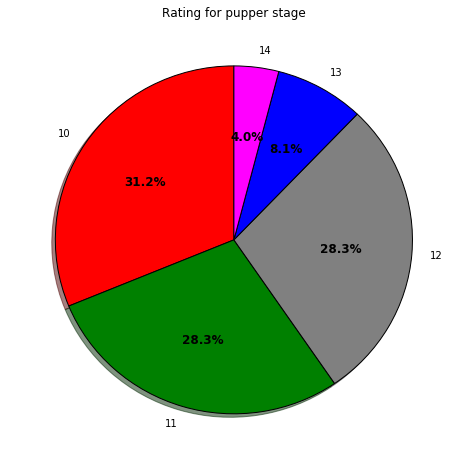

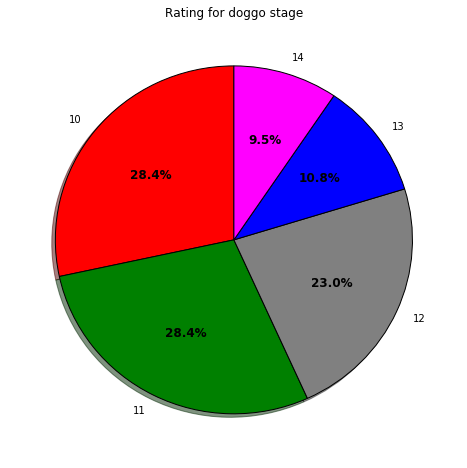

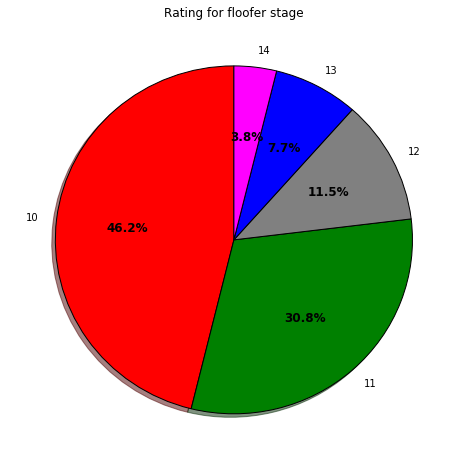

In [115]:
# Labels of pie sections
label = ['10','11','12','13','14']
 
 # Creating color parameters
colors = ( "Red", "Green", "Grey", "Blue", "Magenta")
 
# Wedge attributes
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Displaying the percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating Appointments Attended piechart
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(pupper_stage,
                                  autopct = lambda pct: func(pct, pupper_stage),
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Rating for pupper stage")

 
 # Creating color parameters
colors = ( "Red", "Green", "Grey", "Blue", "Magenta")
 
# Wedge attributes
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Displaying the percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating Appointments Attended piechart
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(doggo_stage,
                                  autopct = lambda pct: func(pct, pupper_stage),
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Rating for doggo stage")

 # Creating color parameters
colors = ( "Red", "Green", "Grey", "Blue", "Magenta")
 
# Wedge attributes
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Displaying the percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating Appointments Attended piechart
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(puppo_stage,
                                  autopct = lambda pct: func(pct, puppo_stage),
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Rating for floofer stage")

Text(0.5,1,'Rating for no dog stage')

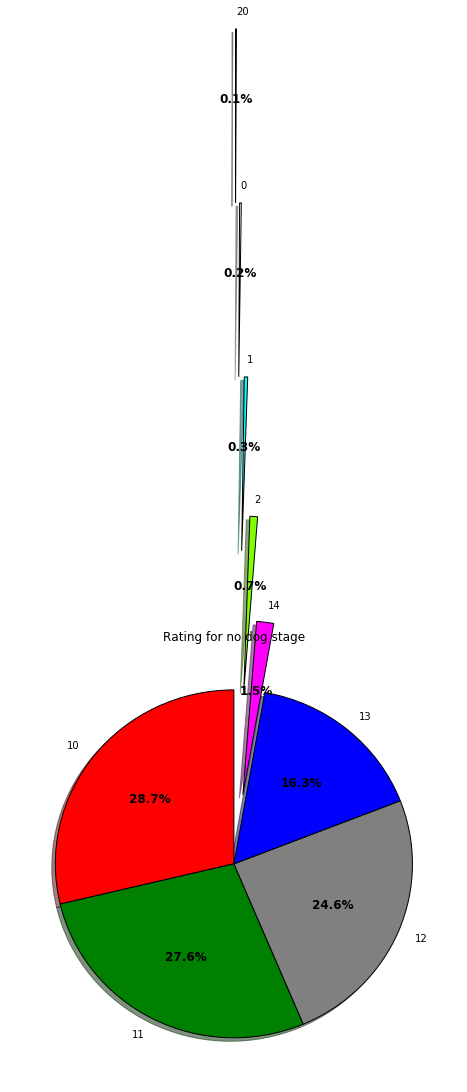

In [120]:
# Labels of pie sections
label = ['10','11','12','13','14', '2', '1', '0', '20']
 
 # Creating color parameters
colors = ( "Red", "Green", "Grey", "Blue", "Magenta", "Chartreuse", "Cyan", "White", "Burlywood")
 
# Wedge attributes
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
explode = (0, 0, 0, 0, 0.4, 1.0, 1.8, 2.8, 3.8)
 
# Displaying the percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating Appointments Attended piechart
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(no_stage,
                                  explode=explode,
                                  autopct = lambda pct: func(pct, no_stage),
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Rating for no dog stage")

Text(0.5,1,'Rating for floofer stage')

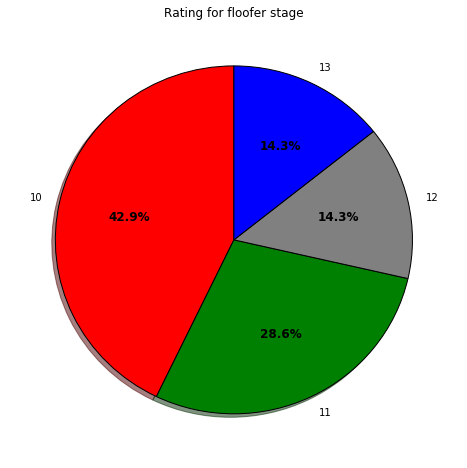

In [118]:
# Labels of pie sections
label = ['10','11','12','13']
 
 # Creating color parameters
colors = ( "Red", "Green", "Grey", "Blue")
 
# Wedge attributes
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Displaying the percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating Appointments Attended piechart
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts, autotexts = ax.pie(floofer_stage,
                                  autopct = lambda pct: func(pct, floofer_stage),
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Rating for floofer stage")